# Evaluating Weather Differences Across Latitudes Using Cities Worldwide

### WeatherAPI data using Python, pandas, matplotlib/seaborn, citipy

-------

### There are three sections to this analysis: 
#### 1. data setup (citipy, API call to OpenWeather)
#### 2. graphing and analysis of variable differences across latitude
#### 3. summary findings of each analysis



* Setup environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


* Gather city data

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(city)
    #print to file        
    with open('city_output.txt', 'w') as f:
                f.write('\n'.join(cities))
# Print the city count to confirm sufficient count
print(len(cities))



632


* Prepare and run the api call

In [3]:
from api_keys import api_key

In [4]:
#create df to hold it, start with dict then convert to df

city_weather = {'City':[],
                'Country':[],
                'Cloudiness':[],
                'Date':[],
                'Humidity':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                'Min Temp':[],
                'Pressure':[],
                'Wind Speed':[],
                'Real Feel Temp':[],
                'City ID':[]}

#loop over cities and add data
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

    try:
        req=requests.get(base_url + f'&q={city}') 
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['City'].append(data['name'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Date'].append(data['dt'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Lat'].append(data['coord']['lat'])
        city_weather['Lng'].append(data['coord']['lon'])
        city_weather['Max Temp'].append(data['main']['temp_max'])
        city_weather['Min Temp'].append(data['main']['temp_min'])
        city_weather['Pressure'].append(data['main']['pressure'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        city_weather['Real Feel Temp'].append(data['main']['feels_like'])
        city_weather['City ID'].append(data['id'])
        
        print("processing " + city + ", city id: " + str(data['id']))
        
    except:
        print(city + " not found")
        pass  #continue on to the next part of loop
    


processing yellowknife, city id: 6185377
processing dale, city id: 4256426
processing hamilton, city id: 4513583
processing hermanus, city id: 3366880
processing umm lajj, city id: 100926
processing kruisfontein, city id: 986717
processing albany, city id: 5106841
processing busselton, city id: 2075265
processing geraldton, city id: 2070998
processing bluff, city id: 2206939
processing cozumel, city id: 3530103
processing lebu, city id: 3883457
processing thompson, city id: 6165406
processing rikitea, city id: 4030556
processing punta arenas, city id: 3874787
processing jumla, city id: 1283285
processing saskylakh, city id: 2017155
processing codrington, city id: 2171099
vaitupu not found
processing mataura, city id: 6201424
processing constitucion, city id: 3893726
processing cape town, city id: 3369157
processing new norfolk, city id: 2155415
sataua not found
processing bosaso, city id: 64013
processing ushuaia, city id: 3833367
processing allapalli, city id: 1278987
nizhneyansk not 

processing hobart, city id: 2163355
processing longyearbyen, city id: 2729907
processing karratha, city id: 6620339
tsihombe not found
processing ancud, city id: 3899695
processing korla, city id: 1529376
processing dudinka, city id: 1507116
processing katherine, city id: 2068655
processing bairiki, city id: 7601762
processing vao, city id: 2137773
processing kavieng, city id: 2094342
processing asbury park, city id: 5095281
processing chitrakonda, city id: 1274055
processing saint-pierre, city id: 935214
processing mehamn, city id: 778707
processing martapura, city id: 1636022
viligili not found
processing deep river, city id: 5937073
processing srednekolymsk, city id: 2121025
processing mayor pablo lagerenza, city id: 3867427
processing vila velha, city id: 3445026
ozgon not found
processing pevek, city id: 2122090
processing bulungu, city id: 2316259
azimur not found
processing nagato, city id: 1899102
eldikan not found
processing toktogul, city id: 1538648
processing valer, city id

processing acapulco, city id: 3533462
processing sumbe, city id: 3346015
mys shmidta not found
processing lagunas, city id: 3695844
processing barra do garcas, city id: 3470709
processing galle, city id: 1246294
processing lillooet, city id: 6945979
processing grand gaube, city id: 934479
processing bani walid, city id: 2218840
processing vanimo, city id: 2084442
processing nadym, city id: 1498087
processing haines junction, city id: 5969025
fevralsk not found
processing tuatapere, city id: 2180815
processing kota kinabalu, city id: 1733432
processing ugoofaaru, city id: 1337619
processing beloha, city id: 1067565
processing morgan city, city id: 4333811
processing cherskiy, city id: 2126199
processing araouane, city id: 2460954
processing leningradskiy, city id: 2123814
processing songadh, city id: 1255762
processing ashqelon, city id: 295620
processing morros, city id: 3394372
processing yarmouth, city id: 4956335
processing udgir, city id: 1253958
processing luwuk, city id: 1637001


In [5]:
print(city_weather)

{'City': ['Yellowknife', 'Dale', 'Hamilton', 'Hermanus', 'Umluj', 'Kruisfontein', 'Albany', 'Busselton', 'Geraldton', 'Bluff', 'San Miguel de Cozumel', 'Lebu', 'Thompson', 'Rikitea', 'Punta Arenas', 'Jumla', 'Saskylakh', 'Codrington', 'Mataura', 'Constitución', 'Cape Town', 'New Norfolk', 'Bosaso', 'Ushuaia', 'Allāpalli', 'Kaitangata', 'Avarua', 'Cabo San Lucas', 'Cidreira', 'East London', 'Vardø', 'Mar del Plata', 'Hasaki', 'Hong Kong', 'Bechem', 'Khovd', 'Baykit', 'São João da Barra', 'Bredasdorp', 'Barrow', 'Henties Bay', 'Labuhan', 'Qian’an', 'Shache', 'Vaini', 'Pochutla', 'Nizhniy Kuranakh', 'Celestún', 'Nikolskoye', 'Westport', 'Ubari', 'Muravlenko', 'Carnarvon', 'Butaritari', 'Najrān', 'Saint-Philippe', 'Puerto Ayora', 'Qaanaaq', 'Portland', 'Kaeo', 'Gao', 'Ambilobe', 'Faanui', 'Changji', 'Te Anau', 'Taoudenni', 'Tuktoyaktuk', 'Port Keats', 'Upernavik', 'Makakilo City', 'Ponta do Sol', 'Mahébourg', 'Hilo', 'Juba', 'Sept-Îles', 'Bichena', 'Kumluca', 'Ilulissat', 'Simao', 'Tiksi',

* Get output into pandas dataframe

In [6]:
city_weather_df = pd.DataFrame.from_dict(city_weather)
print(city_weather_df)


                      City Country  Cloudiness        Date  Humidity      Lat  \
0              Yellowknife      CA          20  1634920274        84  62.4560   
1                     Dale      US          90  1634920300        76  38.1689   
2                 Hamilton      US          90  1634920300        89  39.1834   
3                 Hermanus      ZA          97  1634920033        72 -34.4187   
4                    Umluj      SA           0  1634920048        68  25.0213   
5             Kruisfontein      ZA          36  1634920223        83 -34.0033   
6                   Albany      US          99  1634920302        67  42.6001   
7                Busselton      AU           7  1634920303        73 -33.6500   
8                Geraldton      AU           0  1634920225        77 -28.7667   
9                    Bluff      NZ          95  1634920173        83 -46.6000   
10   San Miguel de Cozumel      MX          75  1634920305        86  20.5083   
11                    Lebu  

* Output dataframe to csv file

In [7]:
#print dataframe to csv file
city_weather_df.to_csv(r'city_weather.csv')

* Added 'hemisphere' data column to dataframe for additional analysis

In [8]:
#add hemisphere column            
city_weather_df["Hemisphere"] = ["Northern" if x>=0 else "Southern" for x in city_weather_df["Lat"]]

* Added 'region' data column to dataframe for additional analysis

In [48]:
#adding regional categories

regional = []

for lat in city_weather_df["Lat"]:
    if (lat>0 and lat<=10) or (lat<0 and lat>=-10):
        regional.append("Equatorial")
    elif  (lat>10 and lat<=30) or (lat<-10 and lat>=-30):
        regional.append("Subtropical")
    elif  (lat>30 and lat<=60) or (lat<-30 and lat>=-60):
        regional.append("Subpolar")
    else:
        regional.append("Polar")

regional_df = pd.DataFrame(regional)

city_weather_df2=pd.concat([city_weather_df,regional_df],axis=1)
city_weather_df3=pd.DataFrame(city_weather_df2).rename(columns={0: "Region"})
city_weather_df3

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Pressure,Wind Speed,Real Feel Temp,City ID,Hemisphere,Region
0,Yellowknife,CA,20,1634920274,84,62.4560,-114.3525,39.42,37.56,1010,19.57,28.51,6185377,Northern,Polar
1,Dale,US,90,1634920300,76,38.1689,-86.9900,57.72,52.66,1019,6.91,54.01,4256426,Northern,Subpolar
2,Hamilton,US,90,1634920300,89,39.1834,-84.5333,54.36,48.38,1017,1.01,50.61,4513583,Northern,Subpolar
3,Hermanus,ZA,97,1634920033,72,-34.4187,19.2345,64.80,56.89,1005,27.29,64.36,3366880,Southern,Subpolar
4,Umluj,SA,0,1634920048,68,25.0213,37.2685,80.76,80.76,1014,12.44,83.91,100926,Northern,Subtropical
5,Kruisfontein,ZA,36,1634920223,83,-34.0033,24.7314,62.89,62.89,1006,4.81,62.78,986717,Southern,Subpolar
6,Albany,US,99,1634920302,67,42.6001,-73.9662,62.28,54.63,1010,1.01,56.97,5106841,Northern,Subpolar
7,Busselton,AU,7,1634920303,73,-33.6500,115.3333,50.09,46.04,1026,7.78,42.04,2075265,Southern,Subpolar
8,Geraldton,AU,0,1634920225,77,-28.7667,114.6000,59.41,56.12,1023,12.66,58.68,2070998,Southern,Subtropical
9,Bluff,NZ,95,1634920173,83,-46.6000,168.3333,48.42,48.42,1027,2.37,48.42,2206939,Southern,Subpolar


## Exploratory Analysis Section

------------

Created scatterplots using matplotlib and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [9]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

#simplify names for reference
df=city_weather_df
lat = "Lat"
c = "Cloudiness"
h = "Humidity"
maxt = "Max Temp"
mint = "Min Temp"
rft = "Real Feel Temp"
p = "Pressure"
w = "Wind Speed"

Cloudiness (%) vs. Latitude

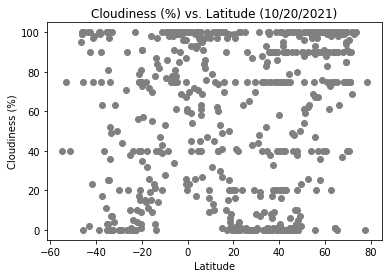

In [10]:
fig, ax = plt.subplots()

ax.scatter(x=df[lat],y=df[c], color='gray')
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.set_title("Cloudiness (%) vs. Latitude (10/20/2021)")
plt.show()
fig.savefig("plt_clouds.png")

Humidity (%) vs. Latitude

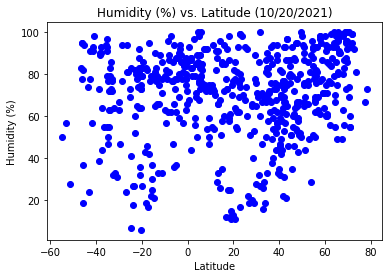

In [11]:
fig, ax = plt.subplots()

ax.scatter(x=df[lat],y=df[h], color='blue')
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.set_title("Humidity (%) vs. Latitude (10/20/2021)")
plt.show()
fig.savefig("plt_humidity.png")

Wind Speed (mph) vs. Latitude

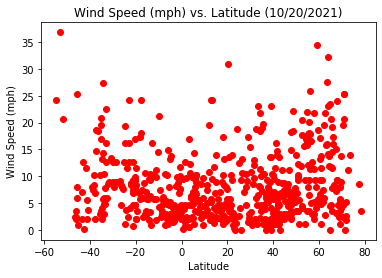

In [12]:
fig, ax = plt.subplots()

ax.scatter(x=df[lat],y=df[w], color="red")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
ax.set_title("Wind Speed (mph) vs. Latitude (10/20/2021)")
plt.show()
fig.savefig("plt_wind.png")

Max Temperature (F) vs. Latitude

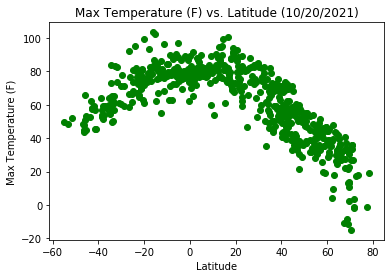

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=df[lat],y=df[maxt], color="green")
ax.set_ylabel("Max Temperature (F)")
ax.set_xlabel("Latitude")
ax.set_title("Max Temperature (F) vs. Latitude (10/20/2021)")
plt.show()
fig.savefig("plt_maxtemp.png")

Atmospheric pressure vs. Latitude

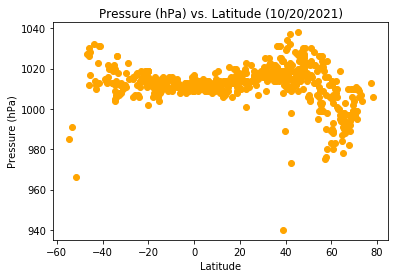

In [14]:
fig, ax = plt.subplots()

ax.scatter(x=df[lat],y=df[p], color="orange")
ax.set_ylabel("Pressure (hPa)")
ax.set_xlabel("Latitude")
ax.set_title("Pressure (hPa) vs. Latitude (10/20/2021)")
plt.show()
fig.savefig("plt_pressure.png")

----------------

Created scatterplots using seaborn and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [16]:
import seaborn as sns

Cloudiness (%) vs. Latitude

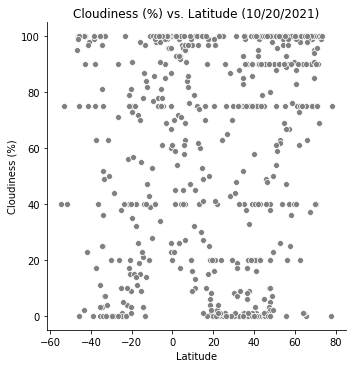

In [35]:
cloud=sns.relplot(x=lat, y=c, data=df, kind="scatter",color="gray")

#specify axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude (10/20/2021)')

plt.show()

cloud.savefig("sns_clouds2.png")


Humidity (%) vs. Latitude

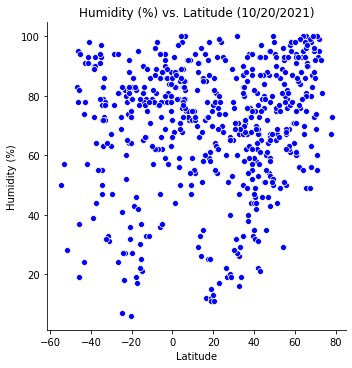

In [36]:
hum = sns.relplot(x=lat, y=h, data=df, kind="scatter",color="blue")
plt.title("Humidity (%) vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
hum.savefig("sns_humidity.png")

Wind Speed (mph) vs. Latitude

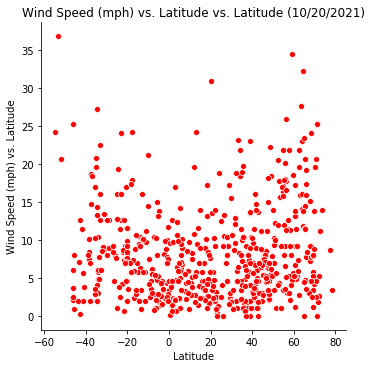

In [37]:
windsns = sns.relplot(x=lat, y=w, data=df, kind="scatter",color="red")
plt.title("Wind Speed (mph) vs. Latitude vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) vs. Latitude")
plt.show()
windsns.savefig("sns_wind.png")

Max Temperature (F) vs. Latitude

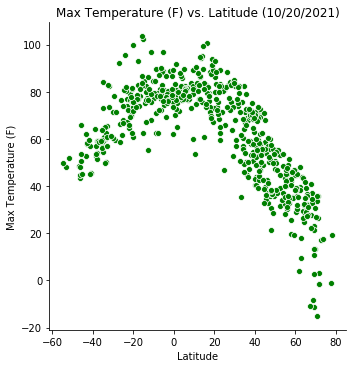

In [38]:
tempsns = sns.relplot(x=lat, y=maxt, data=df, kind="scatter",color="green")
plt.title("Max Temperature (F) vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
tempsns.savefig("sns_temp.png")

Pressure (hPa) vs. Latitude

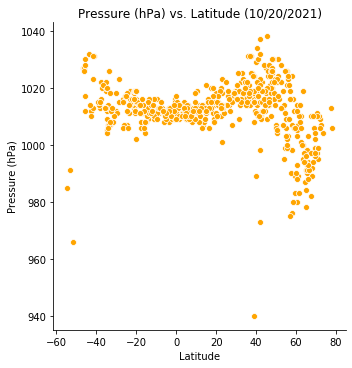

In [40]:
pressuresns = sns.relplot(x=lat, y=p, data=df, kind="scatter",color="orange")
plt.title("Pressure (hPa) vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Pressure (hPa)")
plt.show()
pressuresns.savefig("sns_pressure.png")

## Advanced Analysis and Observed Trends

------------

### Observation 1: Temperature and Latitude correlation

One of the most obvious trends in the data is the relationship between maximum temperature and latitude.  Max temperature increases as latitude reaches 0° (the equator) and decreases as latitude approaches the poles (90°). This is further elucidated by the linear regression models of the Northern and Southern Hemispheres on the latitude vs. max temp graph.  Although a best fit regression line would be polynomial, for simplicity, the dataset was split into Northern and Southern Hemispheres to evaluate the correlation using a linear regression model across the two hemispheres.  **Northern hemisphere latitudes are highly negatively correlated (r = -0.8, p < 0.01, depending on cities in the API call), meaning that as you move north (higher latitudes) there is a decrease in temperature. The same relationship exists for the Southern hemisphere, with a moderate positive correlation (r = 0.6, p < 0.01, depending on cities in the API call), meaning as latitude approaches the south pole the temperature decreases.**  The interpretation is slightly different for Southern hemisphere because latitudes are negative (latitude decreases as you move to the south pole and temperature decreases, creating a positive relationship).  

See the linear regressions on the graph below as well as the statistical output for the Pearson correlation coefficient (and it's p-value that tests for non-correlation).

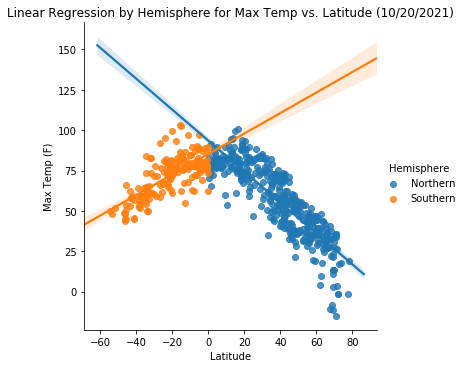

In [42]:
#correlation


corr = sns.lmplot(x="Lat", y="Max Temp", hue="Hemisphere", data=city_weather_df)

ax = plt.gca()

ax.set_title("Linear Regression by Hemisphere for Max Temp vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp (F)")

plt.show()

corr.savefig("temp_correlation.png")

In [43]:
from scipy import stats

northern_df = city_weather_df[city_weather_df["Hemisphere"] == "Northern"]
southern_df = city_weather_df[city_weather_df["Hemisphere"] == "Southern"]

print("NOTE: the output here may differ with each API call")
#Northern Hemisphere correlation
print("Northern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(northern_df['Lat'], northern_df['Max Temp']))
#Southern Hemisphere correlation
print("Southern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(southern_df['Lat'], southern_df['Max Temp']))   



NOTE: the output here may differ with each API call
Northern Hemisphere Max Temp and Latitude correlation statistics:  (-0.8631033447000571, 1.5103573505549632e-119)
Southern Hemisphere Max Temp and Latitude correlation statistics:  (0.7073105546774893, 1.2887698286322366e-28)


### Observation 2: Equatorial Pressure and Latitude

The relationship of pressure and latitude was obscured by *subpolar* and *polar* regions; as these regions see greater variation in pressure across cities in those latitudes.  However, by splitting the the points into regions, the green center, representing the *equatorial* region, is highlighted as a tight cluster of points within a similar pressure range.  **The data suggests that atmospheric pressure in the equatorial region remains similar, expecially when compared to other regions globally.**  However, it is worth noting that the pattern may only hold seasonally, as the time of the data pull coincides with the tropical doldrums - when cloud cover is higher and the winds are lower, creating a lower pressure area.


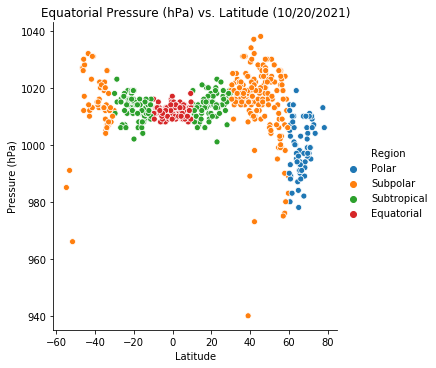

In [49]:

regionalpress = sns.relplot(x="Lat", y="Pressure", data=city_weather_df3, kind="scatter", hue="Region")
plt.title("Equatorial Pressure (hPa) vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Pressure (hPa)")
plt.show()
regionalpress.savefig("regional_pressure.png")

### Observation 3: High Variablity across Wind Speed, Cloudiness, and Humidity

There doesn't appear to be any pattern or relationship of wind speed, cloudiness, or humidity across latitudes.  The data were sliced into regions (color-coded), but no additional patterns emerged.  There may be too much variability across the cities, such as elevation, proximity to waterbodies, and microclimates, to see any patterns.  Season may also play a role, as the seasons are opposite between northern and southern hemispheres.  A more in-depth analysis may be needed to disern additional patterns in these environmental variables.


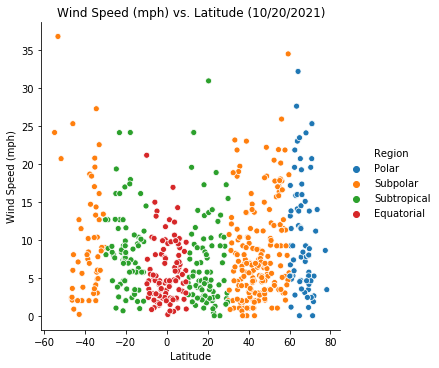

In [50]:
regionalwind = sns.relplot(x="Lat", y="Wind Speed", data=city_weather_df3, kind="scatter", hue="Region")
plt.title("Wind Speed (mph) vs. Latitude (10/20/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
regionalwind.savefig("regional_wind.png")

A 3D graphic was created using Latitude, Pressure and Max Temp, however, no additional patterns emerged.

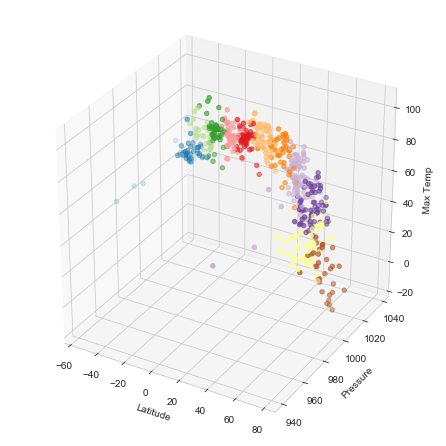

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = city_weather_df['Lat']
y = city_weather_df['Pressure']
z = city_weather_df['Max Temp']

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=True, cmap='Paired')
ax.set_xlabel('Latitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Max Temp')

plt.show()


## Please note:  The data are output throughout the code, and are saved as city_output.txt (the list of cities pulled from citipy) and city_weather.csv, as the csv output of the final dataframe.